# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay, mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions
from threadpoolctl import threadpool_limits

# Load the diabetes dataset from CSV file

In [2]:
diabetes = pd.read_csv("diabetes.csv")

# Separating the features and the target variable

In [3]:
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

# Selecting two features for visualization

In [4]:
X_vis = X[["BMI", "Glucose"]]

# Scaling the features

In [5]:
scaler = StandardScaler()
X_vis = scaler.fit_transform(X_vis)

# Using the threadpoolctl package to limit the number of threads

In [6]:
with threadpool_limits(limits=3):
  # Creating the K-means model with 2 clusters
  kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)

  # Fitting the model on the two features
  kmeans.fit(X_vis)

# Predicting the cluster labels on the two features

In [7]:
y_pred = kmeans.predict(X_vis)

# Printing the cluster centers

In [8]:
print("Cluster centers: \n", kmeans.cluster_centers_)

Cluster centers: 
 [[-0.39074949 -0.59148038]
 [ 0.58995512  0.89301939]]


# Printing the mean squared error and the coefficient of determination

In [9]:
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Mean squared error: 0.27
Coefficient of determination: -0.17


# Plotting the actual and predicted outcomes

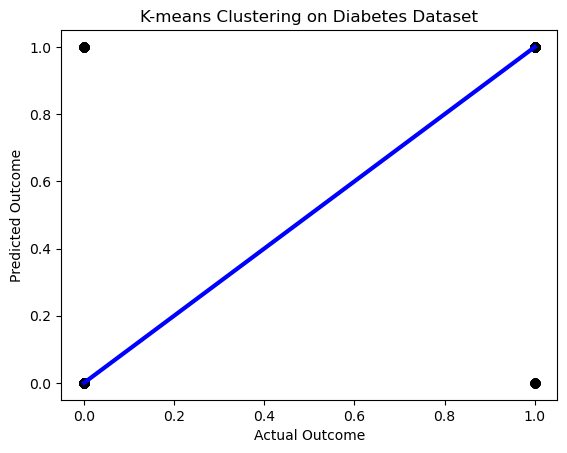

In [10]:
plt.scatter(y, y_pred, color="black")
plt.plot([0, 1], [0, 1], color="blue", linewidth=3)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.title("K-means Clustering on Diabetes Dataset")
plt.show()

# Printing the confusion matrix

In [11]:
cm = confusion_matrix(y, y_pred)
print("Confusion matrix: \n", cm)

Confusion matrix: 
 [[379 121]
 [ 83 185]]


# Plotting the confusion matrix

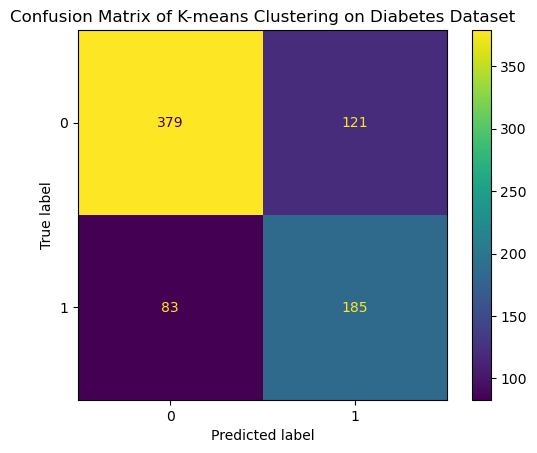

In [12]:
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix of K-means Clustering on Diabetes Dataset")
plt.show()

# Calculating and printing the ROC AUC

In [13]:
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC: %.2f" % roc_auc)

ROC AUC: 0.72


# Plotting the ROC curve

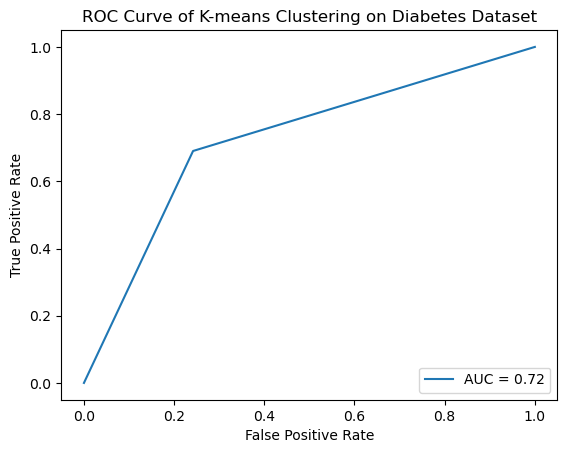

In [14]:
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve of K-means Clustering on Diabetes Dataset")
plt.show()

# Converting the DataFrame to a NumPy array

In [15]:
X_vis = X_vis

# Plotting the decision regions

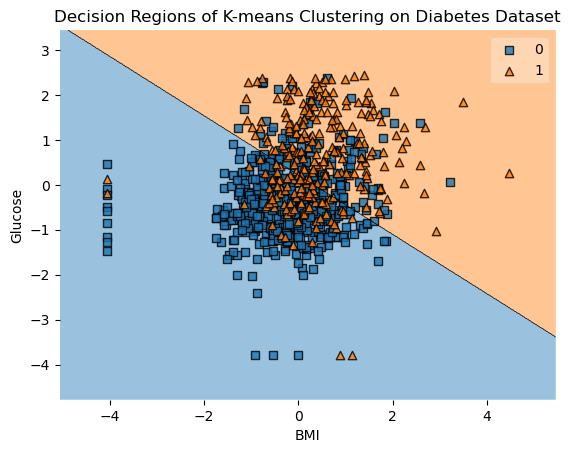

In [16]:
plot_decision_regions(X=X_vis, y=y.values, clf=kmeans)
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title("Decision Regions of K-means Clustering on Diabetes Dataset")
plt.show()